In [ ]:
#Data cleaning and analysis
import pandas as pd 

import numpy as np

import re

#Data visulization
import matplotlib.pyplot as plt

import seaborn as sns

#Model 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#data transform
from sklearn.preprocessing  import LabelEncoder

from sklearn.preprocessing import StandardScaler

#Data split
from sklearn.model_selection import train_test_split

#model evaluate
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")


# Data Loading

In [ ]:
train=pd.read_csv("/content/drive/MyDrive/temp project/Training Data.csv")
test=pd.read_csv("/content/drive/MyDrive/temp project/Testing Data.csv")

# EDA

In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
train.shape

(614, 13)

In [ ]:
#basic statistical information
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


1.   Maximum income of all applicant is 81K.
2.   Maximum Loadn amount is 700.
3.   There is large difference between mean and median(50%) in applicantIncome,so we can say that this data has some outlier




**Data Exploration**



In [ ]:
#cheking unique values
for i in list(train.select_dtypes('object')):
  if i=='Loan_ID':
    continue
  else:
    print(f"{i} column have {train[i].unique()} unique values")

Gender column have ['Male' 'Female' nan] unique values
Married column have ['No' 'Yes' nan] unique values
Dependents column have ['0' '1' '2' '3+' nan] unique values
Education column have ['Graduate' 'Not Graduate'] unique values
Self_Employed column have ['No' 'Yes' nan] unique values
Property_Area column have ['Urban' 'Rural' 'Semiurban'] unique values
Loan_Status column have ['Y' 'N'] unique values


In [ ]:
#let's store cat and con data for exploration
cat=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status','Loan_Amount_Term','Credit_History','Loan_Status']
con=['CoapplicantIncome','ApplicantIncome','LoanAmount']

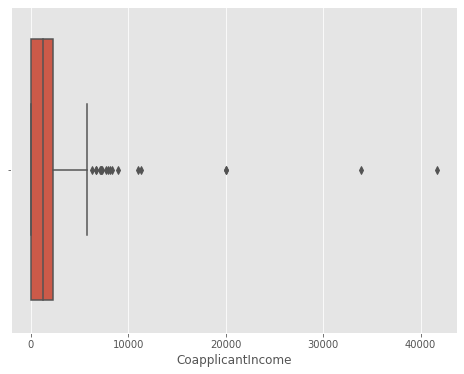

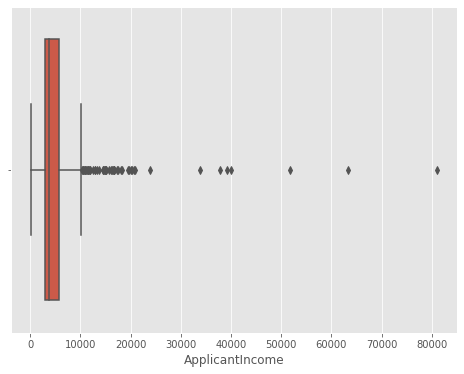

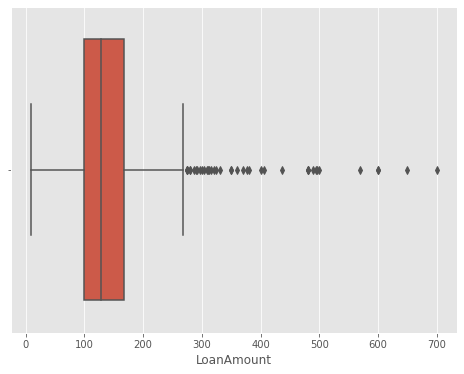

In [ ]:
#exploring continuos value
for col in con:
  plt.figure(figsize=(8,6))
  sns.boxplot(x=train[col])
  plt.show()
  print("\n\n")


All the continous data have many outliers

Applicant Income is bouding between 0 to 80k.




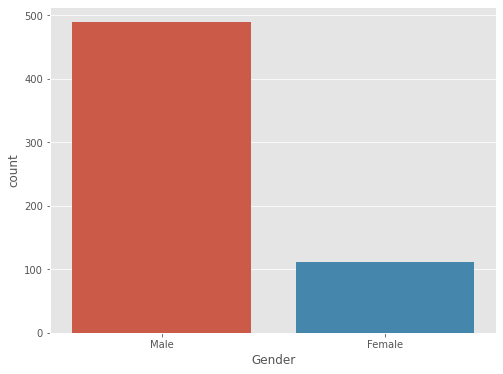

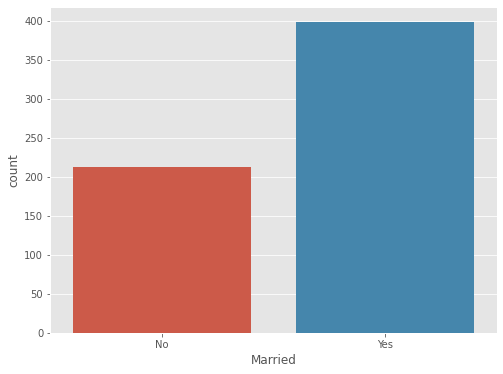

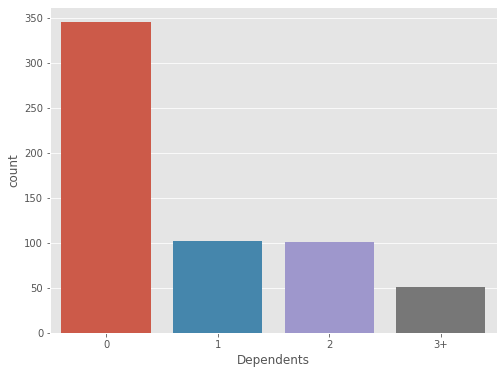

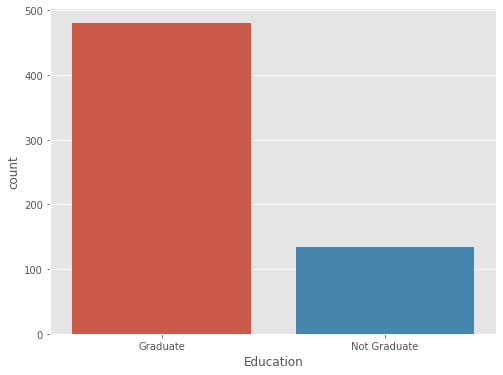

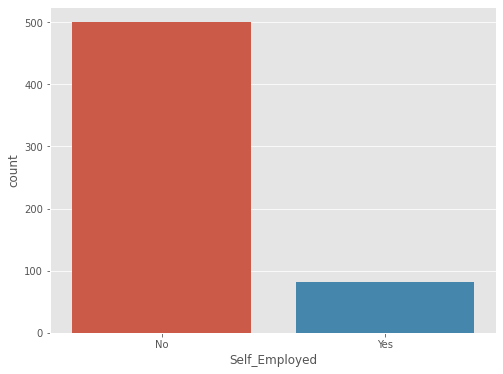

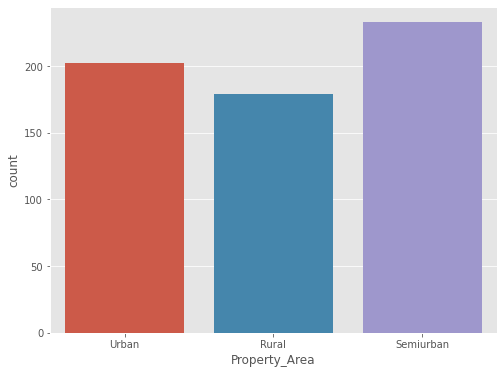

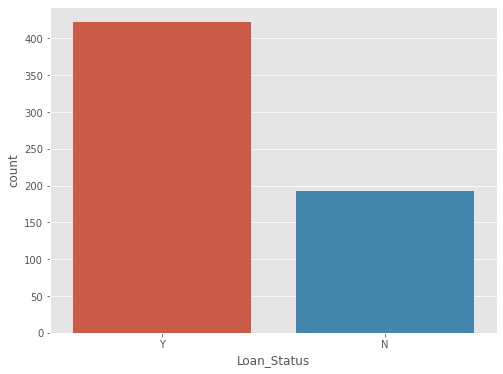

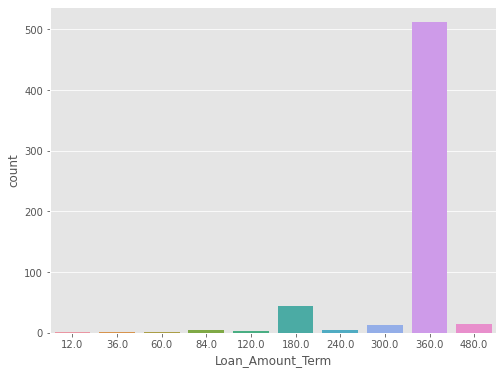

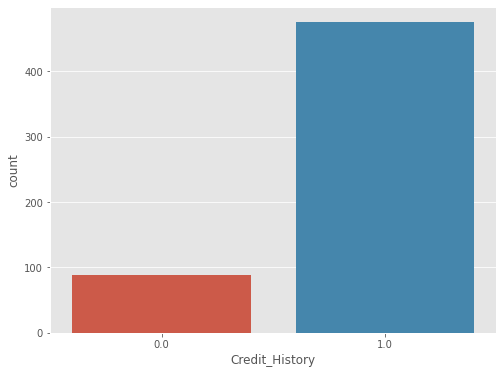

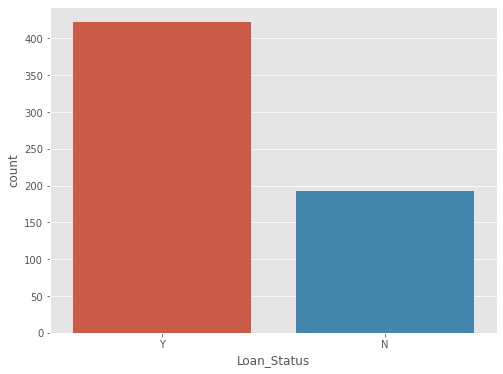

In [ ]:
for col in cat:
  plt.figure(figsize=(8,6))
  sns.countplot(x=train[col])
  plt.show()
  print("\n\n")


In our data most of value of Loan_status is ( Y )

Most of the person has credit History is ( 1 )

Most of the loan applicant has loan_amount_term is ( 360 )


In [ ]:
ratio=round(train.Gender.value_counts()[0]/train.Gender.value_counts()[1],2)
print(f"Male to female ratio is {ratio}")

Male to female ratio is 4.37


In [ ]:
married=len(train[train["Married"]=='Yes'][train["Gender"]=='Male'])
unmarried=len(train[train["Married"]=='No'][train["Gender"]=='Male'])
print(f"Total number of married and unmarried male are {married} and {unmarried}")

Total number of married and unmarried male are 357 and 130


In [ ]:
marriedf=len(train[train["Married"]=='Yes'][train["Gender"]=='Female'])
unmarriedf=len(train[train["Married"]=='No'][train["Gender"]=='Female'])
print(f"Total number of married and unmarried male are {marriedf} and {unmarriedf}")

Total number of married and unmarried male are 31 and 80


In [ ]:
train.groupby(['Gender','Education','Married'])['Married'].count()

Gender  Education     Married
Female  Graduate      No          66
                      Yes         25
        Not Graduate  No          14
                      Yes          6
Male    Graduate      No          99
                      Yes        275
        Not Graduate  No          31
                      Yes         82
Name: Married, dtype: int64

As you can see that Most of the graduated females are Not married and most of the graduated male are Married

In [ ]:
train[train.ApplicantIncome==max(train.ApplicantIncome)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
409,LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N


From the above output, we can say that applicant with the highest income is Male and Married and he has 3+ dependents. There is not any other special information for having the highest income.

**data Cleaning**

In [ ]:
#total null values in every column
print(train.isna().sum())


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [ ]:
print(test.isna().sum())

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [ ]:
# fill values in null data (train data)
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].mean(),inplace=True)


In [ ]:
# fill values in null data (test data)
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].mean(),inplace=True)


In [ ]:
#changing dtype(train data)
for i in cat:
  train[i]=train[i].astype('category')
for i in con:
  train[i]=train[i].astype('int')

In [ ]:
#changing dtype(train data)
for i in cat:
  if i=='Loan_Status':
    continue
  else:
    test[i]=test[i].astype('category')
for i in con:
  test[i]=test[i].astype('int')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Loan_ID            614 non-null    object  
 1   Gender             614 non-null    category
 2   Married            614 non-null    category
 3   Dependents         614 non-null    category
 4   Education          614 non-null    category
 5   Self_Employed      614 non-null    category
 6   ApplicantIncome    614 non-null    int64   
 7   CoapplicantIncome  614 non-null    int64   
 8   LoanAmount         614 non-null    int64   
 9   Loan_Amount_Term   614 non-null    category
 10  Credit_History     614 non-null    category
 11  Property_Area      614 non-null    category
 12  Loan_Status        614 non-null    category
dtypes: category(9), int64(3), object(1)
memory usage: 26.0+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Loan_ID            367 non-null    object  
 1   Gender             367 non-null    category
 2   Married            367 non-null    category
 3   Dependents         367 non-null    category
 4   Education          367 non-null    category
 5   Self_Employed      367 non-null    category
 6   ApplicantIncome    367 non-null    int64   
 7   CoapplicantIncome  367 non-null    int64   
 8   LoanAmount         367 non-null    int64   
 9   Loan_Amount_Term   367 non-null    category
 10  Credit_History     367 non-null    category
 11  Property_Area      367 non-null    category
dtypes: category(8), int64(3), object(1)
memory usage: 15.6+ KB


In [ ]:
#Loan_ID is not important for predication so let's remove loan_id
train.drop(['Loan_ID'],axis=1,inplace=True)
test.drop(['Loan_ID'],axis=1,inplace=True)

# Data visulization

Let's see how target variable is changing with features  

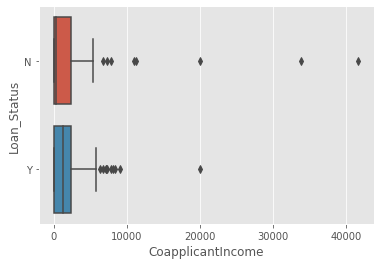

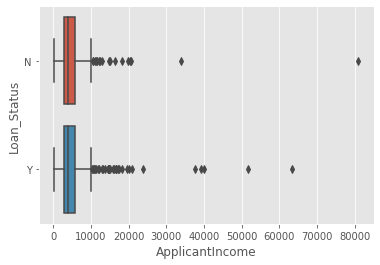

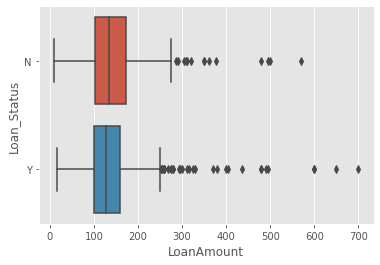

In [ ]:
for i in con:
  sns.boxplot(y='Loan_Status',x=i,data=train)
  plt.show()
  print('\n\n')

As we can see that there is no major difference in  Loan_status value with respect to LoanAmount,ApplicantIncome and coapplicantIncome.




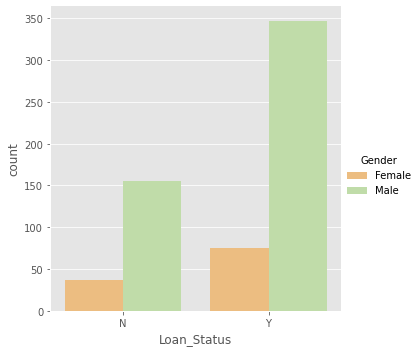

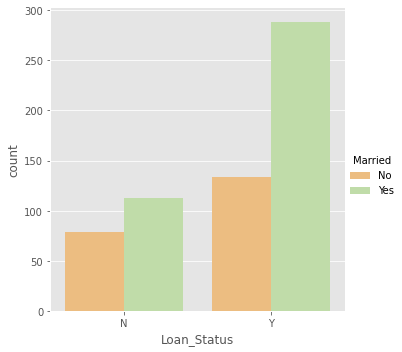

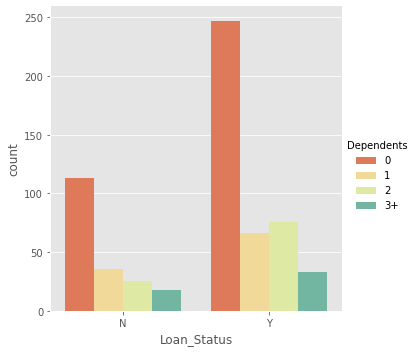

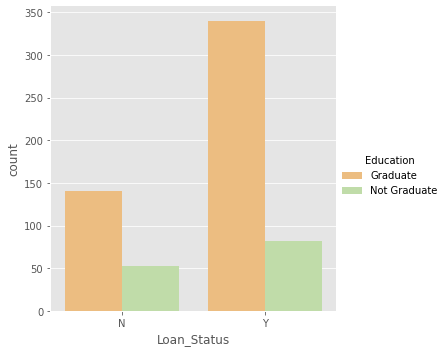

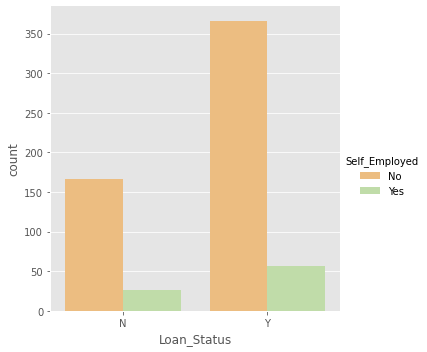

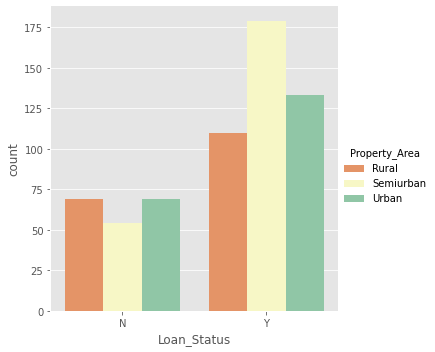

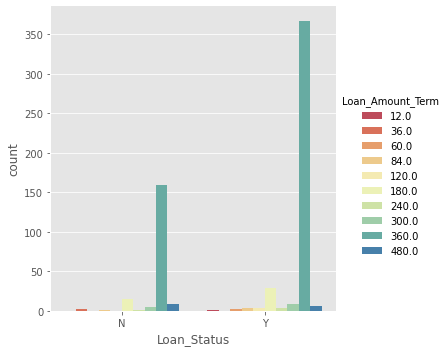

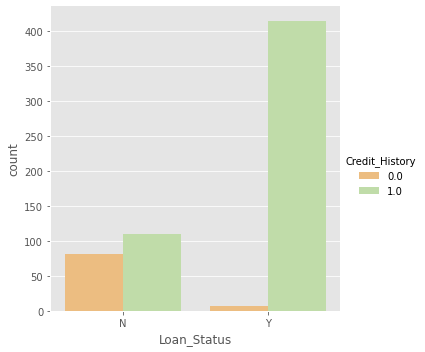

In [ ]:
for i in cat:
  if i=='Loan_Status':
    continue
  else:
    sns.catplot(x='Loan_Status', hue=i, kind='count', palette="Spectral", data=train)
    plt.show()
    print('\n\n')




1.   Male have high chance of Getting load in compare to female.
2.   A married person has a high chance of getting Loan.
3.   Zero dependent person has more chance of getting loan.
4.   Self-Employed has more chance of getting loan.
5.   There is high chance of getting loan who lives in semi-urban area.
6.   If person is taking loan for around 360 months,he/she has high chance of loan approval.
7.   Most of person with credit policy can easily get loan.



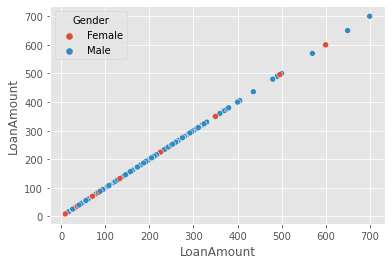

In [ ]:
sns.scatterplot(x="LoanAmount",y="LoanAmount",data=train,hue="Gender")
plt.show()

Male has the highest Loan amount around ( 700 ).

## Feature Engineering

Encoding categorical data in numerical

In [ ]:
train_X=train.iloc[:,:11]

In [ ]:
train_X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0,146,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508,128,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0,66,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358,120,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0,141,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0,71,360.0,1.0,Rural
610,Male,Yes,3+,Graduate,No,4106,0,40,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072,240,253,360.0,1.0,Urban
612,Male,Yes,2,Graduate,No,7583,0,187,360.0,1.0,Urban


In [ ]:
#encode  data
le = LabelEncoder()
train[ train.select_dtypes( include=['category']).columns ] = train[ train.select_dtypes( include=['category']).columns ].apply(le.fit_transform)
test[ test.select_dtypes( include=['category']).columns ] = test[ test.select_dtypes( include=['category']).columns ].apply(le.fit_transform)

Here we have used Lable encoder because the given data is Nominial data(Ex:-country,gender,educated,etc...)

In [ ]:
stds=StandardScaler()

In [ ]:
train[['ApplicantIncome','CoapplicantIncome','LoanAmount']]=stds.fit_transform(train[['ApplicantIncome','CoapplicantIncome','LoanAmount']])

In [ ]:
test[['ApplicantIncome','CoapplicantIncome','LoanAmount']]=stds.fit_transform(test[['ApplicantIncome','CoapplicantIncome','LoanAmount']])

## Model Selection

In [ ]:
# checking fearture importance
from sklearn.ensemble import ExtraTreesClassifier
imp_model = ExtraTreesClassifier()
imp_model.fit(train.drop(['Loan_Status'], axis=1),train['Loan_Status'])
x = imp_model.feature_importances_

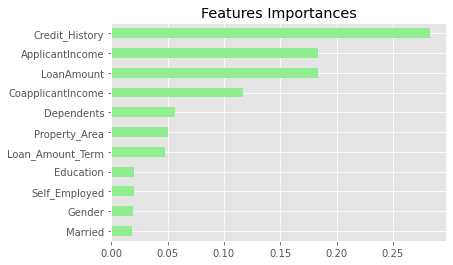

In [ ]:
importances = pd.Series(data=imp_model.feature_importances_[:],
                        index= train.columns[:11])

importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

we will consider only top 7 parameter for our feature predication,Because last 3 parameter not affecting that much on our dependent variable.

In [ ]:
train.drop(['Education','Self_Employed','Married','Gender'],axis=1,inplace=True)

In [ ]:
X=train.iloc[:,:7]

In [ ]:
y=train['Loan_Status']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [ ]:
lgr=LogisticRegression()
kng=KNeighborsClassifier()
rfc=RandomForestClassifier(n_estimators=200)
dt=DecisionTreeClassifier()

In [ ]:
model_name=['lgr','kng','rfc','dt']
for i,model in zip(range(4),[lgr,kng,rfc,dt]):
  model.fit(X_train,y_train)

  pred=model.predict(X_test)

  print("\n",confusion_matrix(y_test,pred))

  print(f" Accuracy of {model_name[i]} is {model.score(X_test,y_test)}")


 [[22 16]
 [ 1 84]]
 Accuracy of lgr is 0.8617886178861789

 [[19 19]
 [ 4 81]]
 Accuracy of kng is 0.8130081300813008

 [[23 15]
 [ 5 80]]
 Accuracy of rfc is 0.8373983739837398

 [[22 16]
 [19 66]]
 Accuracy of dt is 0.7154471544715447


We have used total 4 model and logistic regression is doing well.Logistic regression simple classification Model and it performs well for small dataset and binary classification

The Final Model will be logistic regression with accuracy 86%

In order to improve accuracy we have to gather more data and we can also make some new feature,that will help us to improve accuracy.

In [ ]:
#let's compare actual and predicated value
lgr_temp=LogisticRegression()
lgr_temp.fit(X_train,y_train)
result=pd.DataFrame({'Actual':y_test,'predicated':lgr_temp.predict(X_test)})
result.head(15)

,Actual,predicated
150,0,0
559,1,1
598,1,1
235,1,1
145,1,1
191,0,1
557,1,1
470,1,1
88,1,1
386,1,1


In [ ]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}
accuracy : 0.7984081632653062


From the result we can se that for small dataset hyperoparameter tuning is not working as expected,so we will continue with simple Logistic regression.

In [ ]:
best=LogisticRegression()
best.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Predict on test data
test.drop(['Education','Self_Employed','Married','Gender'],axis=1,inplace=True)
y_pred=best.predict(test)

In [ ]:
import pickle
pickle.dump(best, open('/content/drive/MyDrive/temp project/Model_1.pkl', 'wb'))


**Conclusion**

From the data we can understand that there are several parameter that have high chance of getting loan like If person have zero dependent and have credit policy has higher chance of getting loan.Furthermore if person is from semi-urban and married,he has high chance of getting loan.